In [1]:
import pandas as pd
import numpy as np
import os, glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [2]:
filename = os.path.join(os.getcwd(), "final.txt")
#feature_list = list(df.iloc[:, 0:45].select_dtypes(include="float64"))

In [3]:
df = pd.read_table(filename, low_memory=False)

In [4]:
df.head()

,Unnamed: 0,ac_id,visited_page,diff_dates,Max Date Diff,Min Date Diff,Purchase 30_x,Purchase 60_x,Purchase 90_x,Purchase 120_x,...,arr_ind_21,arr_ind_22,arr_ind_23,arr_ind_24,arr_ind_25,arr_ind_26,arr_ind_27,arr_ind_28,arr_ind_29,arr_ind_30
0,0,ACe761e40e-3259-4e4f-93f9-8f2f2ed34388,REWARDS,52 days,380 days,31 days,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,AC612ca133-52a6-456d-a978-e6ecfa9e87d6,PRICINGENGINE,155 days,386 days,91 days,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2,AC200056f5-32de-4cbd-927d-278f3ee18282,PRICINGENGINE,257 days,336 days,5 days,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,AC200056f5-32de-4cbd-927d-278f3ee18282,PRICINGENGINE,209 days,336 days,5 days,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4,AC4c2519a1-4934-47e6-8c22-2ccfa240b586,MYACCOUNT,246 days,379 days,7 days,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
df.shape

(498668, 67)

In [6]:
labels = []
labels.append('ac_id')
for i in range(1, 31):
    labels.append('arr_ind_' + str(i))

In [7]:
labels #1,20,30,40

['ac_id',
 'arr_ind_1',
 'arr_ind_2',
 'arr_ind_3',
 'arr_ind_4',
 'arr_ind_5',
 'arr_ind_6',
 'arr_ind_7',
 'arr_ind_8',
 'arr_ind_9',
 'arr_ind_10',
 'arr_ind_11',
 'arr_ind_12',
 'arr_ind_13',
 'arr_ind_14',
 'arr_ind_15',
 'arr_ind_16',
 'arr_ind_17',
 'arr_ind_18',
 'arr_ind_19',
 'arr_ind_20',
 'arr_ind_21',
 'arr_ind_22',
 'arr_ind_23',
 'arr_ind_24',
 'arr_ind_25',
 'arr_ind_26',
 'arr_ind_27',
 'arr_ind_28',
 'arr_ind_29',
 'arr_ind_30']

In [8]:
y = df['arr_ind_20'] #repeat for every label

In [9]:
X = df.drop(labels, axis = 1)

In [10]:
from sklearn.preprocessing import LabelBinarizer
#drop it from the df

In [11]:
X['diff_dates'] = LabelBinarizer().fit_transform(X['diff_dates'])

In [12]:
X['Max Date Diff'] = LabelBinarizer().fit_transform(X['Max Date Diff'])

In [13]:
X['Min Date Diff'] = LabelBinarizer().fit_transform(X['Min Date Diff'])

In [14]:
X['visited_page'] = LabelBinarizer().fit_transform(X['visited_page'])

In [15]:
X['Proximity to Payment Due Date'] = LabelBinarizer().fit_transform(X['Proximity to Payment Due Date'])

In [16]:
X.head()

,Unnamed: 0,visited_page,diff_dates,Max Date Diff,Min Date Diff,Purchase 30_x,Purchase 60_x,Purchase 90_x,Purchase 120_x,Purchase 180_x,...,Web 120_y,Web 180_y,Web 360_y,new_account_indicator,spend_active,is_active_balance,has_credit_limit_reached,is_revolving,has_spend_at_any_merchant,Proximity to Payment Due Date
0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,2,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,3,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,4,1,0,0,0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
from sklearn import preprocessing

In [18]:
le = preprocessing.LabelEncoder()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [20]:
X_train.head()

,Unnamed: 0,visited_page,diff_dates,Max Date Diff,Min Date Diff,Purchase 30_x,Purchase 60_x,Purchase 90_x,Purchase 120_x,Purchase 180_x,...,Web 120_y,Web 180_y,Web 360_y,new_account_indicator,spend_active,is_active_balance,has_credit_limit_reached,is_revolving,has_spend_at_any_merchant,Proximity to Payment Due Date
13652,13689,1,0,0,0,0.0,0.0,0.0,1.0,1.0,...,7.0,7.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0
37593,37675,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,0.0,1.0,1.0,0.0,0.0,0.0,0
90188,90423,0,0,0,0,0.0,0.0,0.0,0.0,1.0,...,0.0,7.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,1
81447,81655,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,16.0,0.0,1.0,1.0,0.0,0.0,0.0,0
167091,167540,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [21]:
X_train.shape

(334107, 36)

In [22]:
X_train.head()

,Unnamed: 0,visited_page,diff_dates,Max Date Diff,Min Date Diff,Purchase 30_x,Purchase 60_x,Purchase 90_x,Purchase 120_x,Purchase 180_x,...,Web 120_y,Web 180_y,Web 360_y,new_account_indicator,spend_active,is_active_balance,has_credit_limit_reached,is_revolving,has_spend_at_any_merchant,Proximity to Payment Due Date
13652,13689,1,0,0,0,0.0,0.0,0.0,1.0,1.0,...,7.0,7.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0
37593,37675,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,0.0,1.0,1.0,0.0,0.0,0.0,0
90188,90423,0,0,0,0,0.0,0.0,0.0,0.0,1.0,...,0.0,7.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,1
81447,81655,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,16.0,0.0,1.0,1.0,0.0,0.0,0.0,0
167091,167540,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [23]:
y_train

13652     1.0
37593     1.0
90188     0.0
81447     1.0
167091    1.0
         ... 
453836    1.0
384053    1.0
165158    1.0
451283    1.0
486191    1.0
Name: arr_ind_20, Length: 334107, dtype: float64

In [24]:
rf_20_model = RandomForestClassifier(criterion='entropy', n_estimators=20)

In [25]:
rf_20_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [26]:
rf_20_predictions = list(rf_20_model.predict_proba(X_test)[:,1])

In [27]:
[fpr_20, tpr_20, thresholds_20] = roc_curve(y_test, rf_20_predictions)

Plotting ROC Curve...


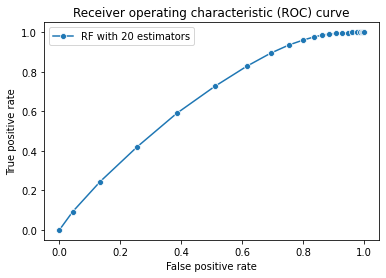

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_20, y=tpr_20, marker = 'o')
plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with 20 estimators', 'RF with 100 estimators'])
plt.show()

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model = RandomForestRegressor(random_state=42)

In [32]:
rf_20_model.score(X_train, y_train)

0.9970219121419186

In [34]:
from sklearn.tree import plot_tree, export_text

In [35]:
plt.figure(figsize=(80,20))

<Figure size 5760x1440 with 0 Axes>

<Figure size 5760x1440 with 0 Axes>

[Text(209.25, 190.26, 'X[20] <= 38.0\nentropy = 0.688\nsamples = 211056\nvalue = [61352, 272755]'),
 Text(167.4, 135.9, 'X[25] <= 10.5\nentropy = 0.688\nsamples = 211021\nvalue = [61352, 272701]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 499954.5\nentropy = 0.687\nsamples = 198145\nvalue = [57404, 256151]'),
 Text(41.85, 27.180000000000007, '\n  (...)  \n'),
 Text(125.55000000000001, 27.180000000000007, '\n  (...)  \n'),
 Text(251.10000000000002, 81.53999999999999, 'X[18] <= 7.5\nentropy = 0.707\nsamples = 12876\nvalue = [3948, 16550]'),
 Text(209.25, 27.180000000000007, '\n  (...)  \n'),
 Text(292.95, 27.180000000000007, '\n  (...)  \n'),
 Text(251.10000000000002, 135.9, 'entropy = 0.0\nsamples = 35\nvalue = [0, 54]')]

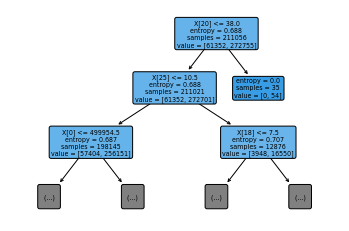

In [44]:
plot_tree(rf_20_model.estimators_[0], max_depth=2, filled=True, rounded=True)

In [41]:
rf_20_model.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=397893629)

In [45]:
def test_params(param):
    model = RandomForestClassifier(criterion='entropy', n_estimators=param).fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test, y_test)


20
40
60
80
100


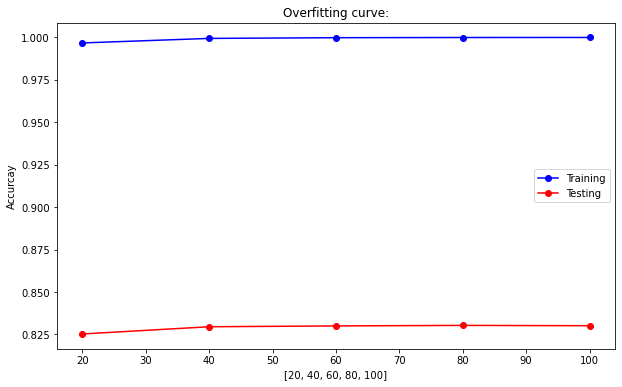

In [47]:
params = [20, 40, 60, 80, 100]
train_accs = []
test_accs = []
for param in params:
    print(param)
    train_acc, test_acc = test_params(param)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
plt.figure(figsize=(10,6))
plt.title('Overfitting curve:')
plt.plot(params, train_accs, 'b-o')
plt.plot(params, test_accs, 'r-o')
plt.xlabel(params)
plt.ylabel('Accurcay')
plt.legend(['Training', 'Testing'])